# Understanding Student Data - Analysing and visualizing data from a CSV file

In this module, we will be working on a project that involves analyzing and visualizing data from a CSV file. The specific data set we will be using is the "Student Performance Data Set" from https://archive.ics.uci.edu/ml/datasets/Student+Performance.

You will learn about:

- Loading CSVs
- PyArrow
- Summary Stats
- Correlations
- Cross Tabulations
- Visualizations


## Loading from a ZIP File

In [2]:
import pandas as pd

import io
from urllib.request import urlopen
import zipfile

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

fin = urlopen(url)
with zipfile.ZipFile(io.BytesIO(fin.read())) as zip:
  print(zip.namelist())

['student-mat.csv', 'student-por.csv', 'student-merge.R', 'student.txt']


In [4]:
%%bash
mkdir data
curl --output data/student.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip 

mkdir: cannot create directory ‘data’: File exists


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20478    0 20478    0     0  24063      0 --:--:-- --:--:-- --:--:-- 24035


In [5]:
path = 'data/student.zip'
with zipfile.ZipFile(path) as zip:
  print(zip.namelist())

['student-mat.csv', 'student-por.csv', 'student-merge.R', 'student.txt']


In [6]:
# read in the content of student.txt from the zip file
with zipfile.ZipFile(path) as zip:
    with zip.open("student.txt", "r") as student_file:
        print(student_file.read().decode('utf-8'))

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

In [7]:
with zipfile.ZipFile(path) as zip:
  df = pd.read_csv(zip.open('student-mat.csv'), sep=';')

In [8]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [9]:
df.memory_usage(deep=True).sum()

454598

In [10]:
path = "data/student.zip"
with zipfile.ZipFile(path) as zip:
    df = pd.read_csv(
        zip.open("student-mat.csv"), sep=";", dtype_backend="pyarrow",engine="pyarrow"
    )

In [11]:
df.memory_usage(deep=True).sum()

98703

In [12]:
%%timeit
# pandas 2 optimizations
# dtype_backend - store with pyarrow
# engine - multithreaded w/ pyarrow
path = 'data/student.zip'

with zipfile.ZipFile(path) as zip:
  df = pd.read_csv(zip.open('student-mat.csv'), sep=';',
                  dtype_backend='pyarrow', engine='pyarrow')

10.5 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
# pandas 2 optimizations
# dtype_backend - store with pyarrow
# engine - multithreaded w/ pyarrow
path = 'data/student.zip'

with zipfile.ZipFile(path) as zip:
  df = pd.read_csv(zip.open('student-mat.csv'), sep=';')

2.76 ms ± 296 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None,
    keep_default_na: 'bool' = True,
    n

## Summary Stats



### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

In [14]:
df.dtypes

school        string[pyarrow]
sex           string[pyarrow]
age            int64[pyarrow]
address       string[pyarrow]
famsize       string[pyarrow]
Pstatus       string[pyarrow]
Medu           int64[pyarrow]
Fedu           int64[pyarrow]
Mjob          string[pyarrow]
Fjob          string[pyarrow]
reason        string[pyarrow]
guardian      string[pyarrow]
traveltime     int64[pyarrow]
studytime      int64[pyarrow]
failures       int64[pyarrow]
schoolsup     string[pyarrow]
famsup        string[pyarrow]
paid          string[pyarrow]
activities    string[pyarrow]
nursery       string[pyarrow]
higher        string[pyarrow]
internet      string[pyarrow]
romantic      string[pyarrow]
famrel         int64[pyarrow]
freetime       int64[pyarrow]
goout          int64[pyarrow]
Dalc           int64[pyarrow]
Walc           int64[pyarrow]
health         int64[pyarrow]
absences       int64[pyarrow]
G1             int64[pyarrow]
G2             int64[pyarrow]
G3             int64[pyarrow]
dtype: obj

In [15]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [16]:
df.quantile(.99)

ArrowNotImplementedError: Function 'quantile' has no kernel matching input types (string)

In [17]:
df.quantile(.99, numeric_only=True)

age           20.00
Medu           4.00
Fedu           4.00
traveltime     4.00
studytime      4.00
failures       3.00
famrel         5.00
freetime       5.00
goout          5.00
Dalc           5.00
Walc           5.00
health         5.00
absences      38.12
G1            18.00
G2            18.00
G3            19.00
Name: 0.99, dtype: double[pyarrow]

In [18]:
df.quantile([.01,.3,.5, .8, .99], numeric_only=True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0.01,15.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00,5.0,0.0,0.0
0.30,16.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,1.0,3.0,2.00,9.0,9.0,9.0
0.50,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,4.00,11.0,11.0,11.0
0.80,18.0,4.0,4.0,2.0,3.0,1.0,5.0,4.0,4.0,2.0,3.2,5.0,10.00,14.0,14.0,14.0
0.99,20.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,38.12,18.0,18.0,19.0


<Axes: >

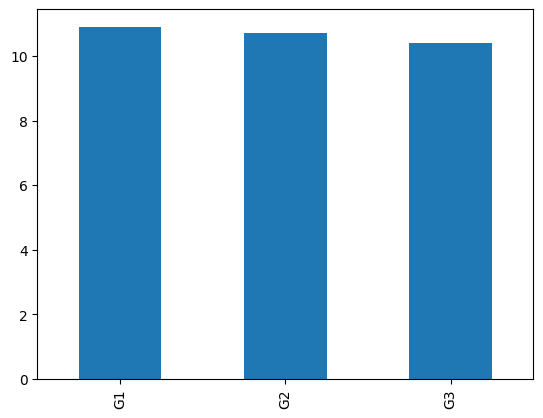

In [19]:
df[["G1", "G2", "G3"]].mean().plot(kind="bar")

<Axes: xlabel='sex'>

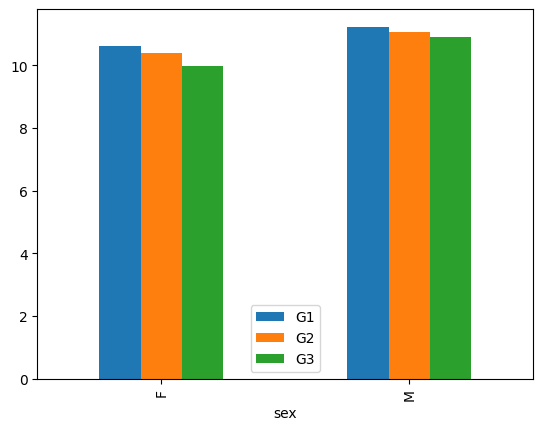

In [20]:
df.groupby("sex")[["G1", "G2", "G3"]].mean().plot(kind="bar")

## Correlations

In [24]:
df.corr(numeric_only=True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [25]:
(df
 .corr(numeric_only=True)
 .style
 .background_gradient()
)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [26]:
(df
 .corr(numeric_only=True)
 .style
 .background_gradient(cmap='RdBu')
)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [27]:
(df
 .corr(numeric_only=True)
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [28]:
(df
 .corr(numeric_only=True, method='spearman')
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.161294,-0.149596,0.109804,0.031557,0.236464,0.031380,0.000302,0.140131,0.097073,0.132799,-0.075150,0.149276,-0.057630,-0.167622,-0.173438
Medu,-0.161294,1.000000,0.631577,-0.147849,0.063498,-0.242373,0.012361,0.028493,0.064954,0.022729,-0.044332,-0.035686,0.097562,0.209662,0.236354,0.225036
Fedu,-0.149596,0.631577,1.000000,-0.154454,0.018429,-0.236616,0.011400,-0.017132,0.047961,0.003994,-0.014486,0.018113,0.003568,0.194737,0.194844,0.170049
traveltime,0.109804,-0.147849,-0.154454,1.000000,-0.105969,0.079917,-0.038656,-0.022279,-0.001430,0.066477,0.063654,-0.015452,-0.025061,-0.085501,-0.123795,-0.120530
studytime,0.031557,0.063498,0.018429,-0.105969,1.000000,-0.157633,0.058141,-0.131321,-0.065979,-0.217904,-0.264021,-0.091497,-0.046180,0.162286,0.129160,0.105170
failures,0.236464,-0.242373,-0.236616,0.079917,-0.157633,1.000000,-0.051389,0.088058,0.105419,0.187492,0.127912,0.079688,0.096028,-0.346052,-0.362357,-0.361224
famrel,0.031380,0.012361,0.011400,-0.038656,0.058141,-0.051389,1.000000,0.143142,0.063549,-0.106338,-0.116060,0.085341,-0.086577,0.026433,0.008165,0.054977
freetime,0.000302,0.028493,-0.017132,-0.022279,-0.131321,0.088058,0.143142,1.000000,0.285182,0.194223,0.130246,0.088975,0.013397,0.006973,-0.016765,-0.004994
goout,0.140131,0.064954,0.047961,-0.001430,-0.065979,0.105419,0.063549,0.285182,1.000000,0.255146,0.393333,-0.018541,0.133280,-0.151636,-0.160985,-0.166119
Dalc,0.097073,0.022729,0.003994,0.066477,-0.217904,0.187492,-0.106338,0.194223,0.255146,1.000000,0.639906,0.095139,0.129651,-0.111438,-0.110086,-0.120944


## Categorical Columns

In [29]:
# pandas 1.x
df.select_dtypes(object)

""
0
1
2
3
4
...
390
391
392
393


In [30]:
# pandas 2 w/ pyarrow
df.select_dtypes('string')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [31]:
# pandas 2 w/ pyarrow
df.select_dtypes('string[pyarrow]')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [32]:
df.famsize.value_counts()

famsize
GT3    281
LE3    114
Name: count, dtype: int64[pyarrow]

In [37]:
df.higher.value_counts()

higher
yes    375
no      20
Name: count, dtype: int64[pyarrow]

In [38]:
pd.crosstab(df.sex, df.higher)

higher,no,yes
sex,,
F,4,204
M,16,171


In [39]:
# normalize across all cells
pd.crosstab(df.sex, df.higher, normalize=True)

higher,no,yes
sex,,
F,0.010127,0.516456
M,0.040506,0.432911


In [40]:
(pd.crosstab(df.sex, df.higher, normalize=True)
 .style
 .format('{:.2%}')
)

higher,no,yes
sex,,
F,1.01%,51.65%
M,4.05%,43.29%


In [41]:
(pd.crosstab(df.sex, df.higher, normalize='index')
 .style
 .format('{:.2%}')
)

higher,no,yes
sex,,
F,1.92%,98.08%
M,8.56%,91.44%


In [42]:
# normalize down columns
(pd.crosstab(df.sex, df.higher, normalize='columns')
 .style
 .format('{:.2%}')
)

higher,no,yes
sex,,
F,20.00%,54.40%
M,80.00%,45.60%


## Visualizations

<Axes: >

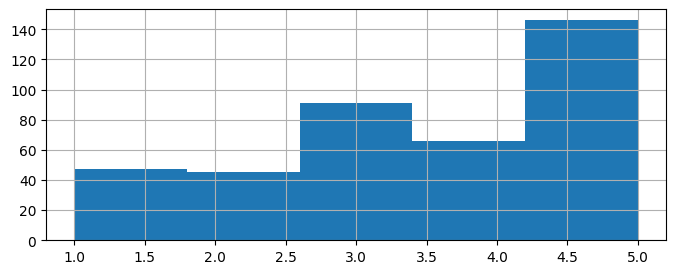

In [45]:
# health - current health status (numeric: from 1 - very bad to 5 - very good)
df.health.hist(figsize=(8,3), bins=5)

<Axes: >

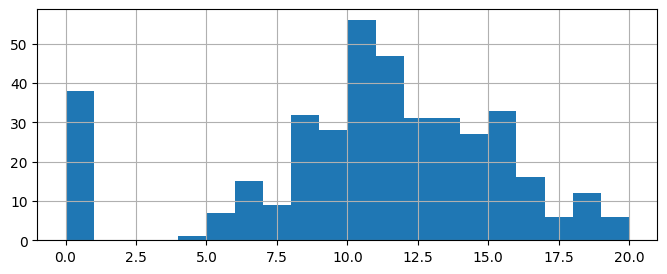

In [46]:
# G3 - final grade (numeric: from 0 to 20, output target)
df.G3.hist(figsize=(8,3), bins=20)

<Axes: xlabel='Medu', ylabel='G3'>

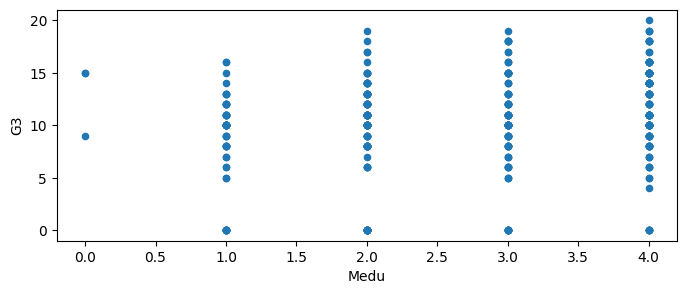

In [47]:
df.plot.scatter(x='Medu', y='G3', figsize=(8,3))

<Axes: xlabel='Medu', ylabel='G3'>

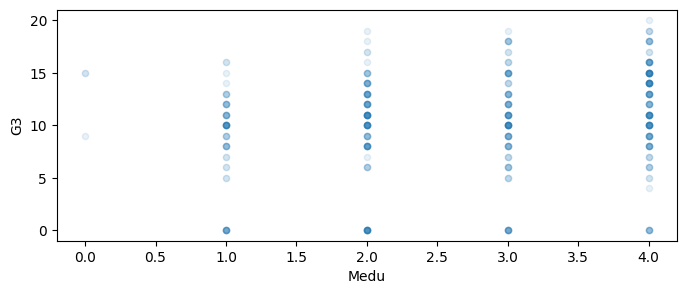

In [51]:
# Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 
# 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

df.plot.scatter(x='Medu', y='G3', alpha=.1, figsize=(8,3))

<Axes: xlabel='edu_jit', ylabel='G3'>

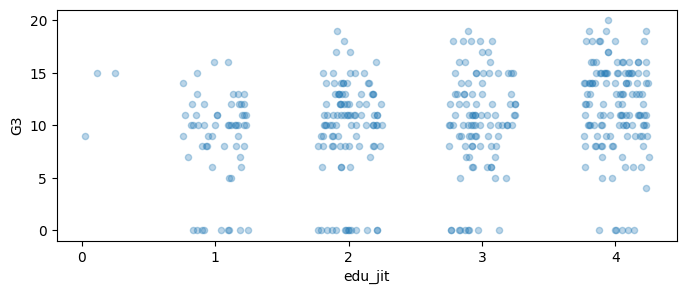

In [52]:
import numpy as np
amt = .5
(df
 .assign(edu_jit=df.Medu + np.random.random(len(df))*amt - amt/2)
 .plot.scatter(x='edu_jit', y='G3', alpha=.3, figsize=(8,3))
)

<Axes: xlabel='edu_jit', ylabel='G3'>

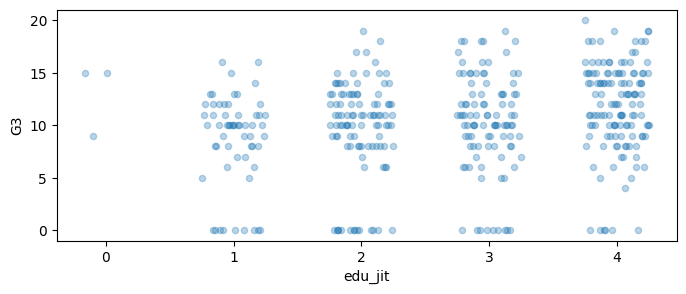

In [53]:
import numpy as np

def jitter(df, col, amt=.5):
    return df[col] + np.random.random(len(df))*amt - amt/2


(df
 .assign(edu_jit=lambda df_: jitter(df_, col='Medu'))
 .plot.scatter(x='edu_jit', y='G3', alpha=.3, figsize=(8,3))
)

In [ ]:
# add jitter to a helpers.py file

<Axes: xlabel='guardian'>

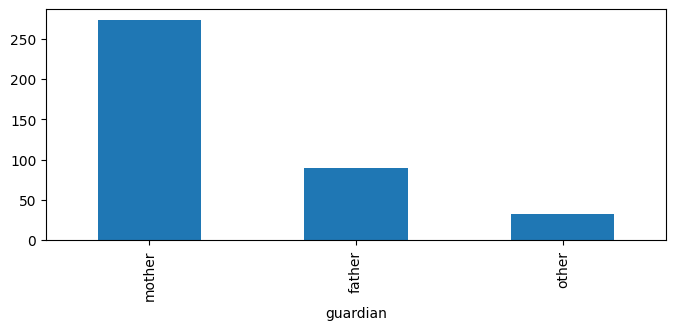

In [54]:
# guardian - student's guardian (nominal: 'mother', 'father' or 'other')
df.guardian.value_counts().plot.bar(figsize=(8,3))

<Axes: ylabel='guardian'>

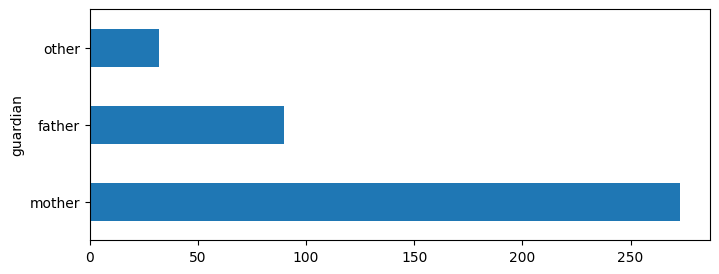

In [55]:
df.guardian.value_counts().plot.barh(figsize=(8,3))